# Predictability of Player Subscription Status - DSCI 100 Project: Group 31 Section 5

# Introduction
We will be investigating the behaviour of people who play games using the dataset `players.csv` which was collected by Frank Wood's research group at UBC Computer Science from a MineCraft server that records each individual player's information. This information is collected to gain knowledge on how to go about player recruitment and the resources required to handle the amount of players.

From the `players.csv` dataset we are investigating, "Can age and hours played predict if a player has subscribed to the newsletter?" To have success in the gaming industry, it is important to prioritize player engagement and retention. One way to maintain engagement is through newsletter subscription. However, not all players subscribe to the newsletter, allowing for identification of factors that affect player subscription. Understanding trends of player variables can help tailor marketing strategies such as personalized outreach, to target specific players based on their behaviour.

The `players.csv` dataset represents different information of all players recorded in the dataset; the variables include:

- Number of observations: 196
- Number of variables: 7
- experience: How experienced the player is in MineCraft (Rank: Beginning, Amateur, Regular, Pro, Veteran), Type: character
- subscribe: Whether or not the player as subscribed to the game related newsletter (True or False), Type: logical
- hashedEmail: The email of each player converted into a string of different characters, Type: character
- played_hours: Amount of total hours played, Type: double
- name: The player's name, Type: character
- gender: The player's gender, Type: character
- Age: The player's age, Type: double

# Methods & Results

In [7]:
library(tidyverse)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)

First, we input the dataset into our file. The data is pulled from an online url through github to ensure reproducibility across devices. We then use the `read_csv` file to pull the data file into R into a tibble so that we can perform our analysis.

In [9]:
set.seed(2000)
players.csv <- "https://raw.githubusercontent.com/justin-pilson/dsci-100-project-2025w2-group-31/refs/heads/main/players.csv"
players <- read_csv('players.csv')
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Next, we wrangle and tidy the data by eliminating unnecessary variables and ensuring the labels are consistently formatted. Since we are only looking at played_hours, age, and subscription status for our analysis, we will remove the rest. This step is not completely necessary to complete our model, however it simplifies the dataset making it easier to work with. We will also change 'Age' to 'age', for consistency. Other than this, the data is tidy and ready for analysis.

To change the name, we will use the `mutate` function. To eliminate the variables, we will use the `select` function.

In [12]:
players_simplified <- players |>
    mutate(age = Age) |>
    select(age, subscribe, played_hours)

players_simplified

age,subscribe,played_hours
<dbl>,<lgl>,<dbl>
9,TRUE,30.3
17,TRUE,3.8
17,FALSE,0.0
⋮,⋮,⋮
17,FALSE,0.0
17,FALSE,2.3
NA,TRUE,0.2


To further develop our understanding of the dataset, we will perform some summary statistics.

Firstly, we calculate the averages of both quantitative variables using `summarize`.

In [14]:
avg_played_hours <- players_simplified |>
    summarize(avg_hours = mean(played_hours)) |>
    pull()

avg_age <- players_simplified |>
    summarize(avg_age = mean(age, na.rm = TRUE)) |>
    pull()

averages <- tibble(avg_hours = round(avg_played_hours, 2), avg_age = round(avg_age, 2))
averages

avg_hours,avg_age
<dbl>,<dbl>
5.85,20.52


To help us discover patterns in the data before our analys, we create 3 summary plots:
- A bar graph showing the average hours by subscription status
- A histogram distribution of players' ages
- A scatterplot showing age vs. played hours, colouring the dots by subscription status

The bar graph first uses `group_by` and `summarize` to calculate the average hours played based on their subscription status. We then use `ggplot` to create the plot, classifying subscription status as *x* and average played hours as *y*. Next, we use `geom_bar`, classifying the *stat* argument as "identity" and adding a fill colour of #e87478 for aesthetic purposes. Finally, we add the x-label, y-label, and title using `labs` and change the text size using `theme`.

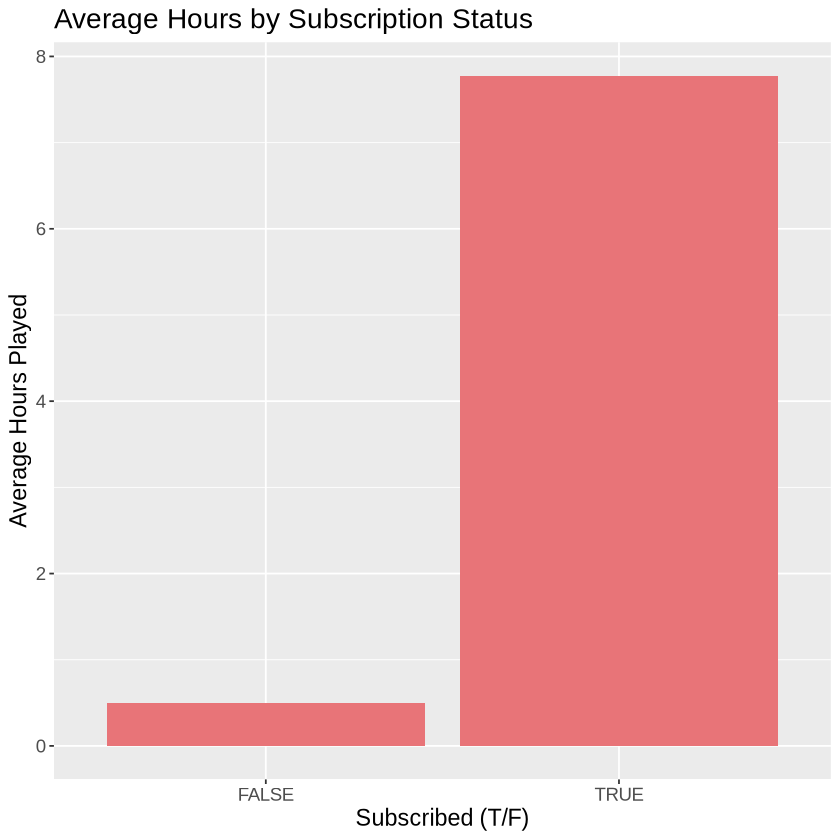

In [16]:
avg_hours_plot <- players_simplified |>
    group_by(subscribe) |>
    summarize(avg_hours = mean(played_hours)) |>
    ggplot(aes(x = subscribe, y = avg_hours)) +
        geom_bar(stat = "identity", fill = '#e87478') +  
        labs(title = 'Average Hours by Subscription Status', 
             x = 'Subscribed (T/F)', 
             y = 'Average Hours Played') +
        theme(text = element_text(size = 14))

avg_hours_plot

# Discussion